<a href="https://colab.research.google.com/github/kianakiaei/TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to neural network classification with tensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification



## Creating data to view and fit


In [88]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03, 
                    random_state=42)

In [89]:
# Check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [90]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [91]:
import pandas as pd

circles = pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


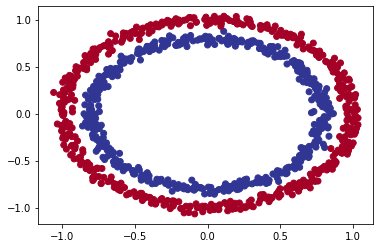

In [92]:
# Visualize with a plot
import matplotlib.pyplot as plt

# c is color
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

Spend playing around http://playground.tensorflow.org building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [93]:
# Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [94]:
# How many samples we're working
len(x), len(y)

(1000, 1000)

In [95]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Step in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweek
6. Evaluate...

In [96]:
import tensorflow as tf

In [97]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [98]:
# Lets's try and improve our model by training for longer...

model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if guessing.

So let's step things up a notch and add extra layer.

In [99]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [100]:
# 4. Evaluate the model
model_2.evaluate(x, y)

# we add extra layer but accuracy not change

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [101]:
circles["label"].value_counts()

# Data is ballanced

1    500
0    500
Name: label, dtype: int64

# Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [102]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # add 100 dense neurons
                               tf.keras.layers.Dense(10), # add another layer with 10 neurons
                               tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [103]:
# 4. Evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

**Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inspect your model's predictions.

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (x) and labels (y)
* Create a meshgrid of the different x values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

## visualize

In [104]:
import numpy as np

In [105]:
def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/MadeWithML
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create x value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stach 2D arrays together    

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [106]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

doing binary classification


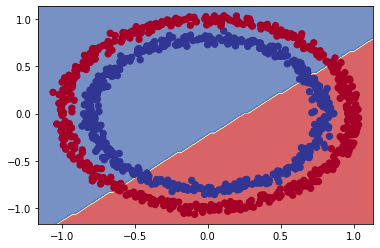

In [107]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y)

Now we find why accuracy did not increase

## The missing piece: Non-linearity

https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

In [108]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(x, y, epochs=100, verbose=0)

In [109]:
model_4.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 3.2448 - accuracy: 0.4560


[3.2447562217712402, 0.4560000002384186]

doing binary classification


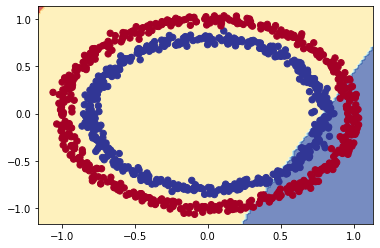

In [110]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_4,
                       x=x,
                       y=y)

if blue points are in blue class and red points are in red class, mean right. yellow is crossover.

Let's try build our first neural network with a non-linear activation function

In [111]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(x, y, epochs=100, verbose=0)

In [112]:
model_5.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 3.2448 - accuracy: 0.4560


[3.2447562217712402, 0.4560000002384186]

doing binary classification


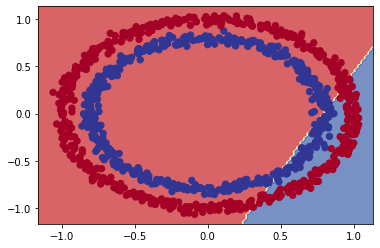

In [113]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_5,
                       x=x,
                       y=y)

In [114]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(x, y, epochs=100, verbose=0)

In [115]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.3780


[0.6642990708351135, 0.3779999911785126]

doing multiclass classification


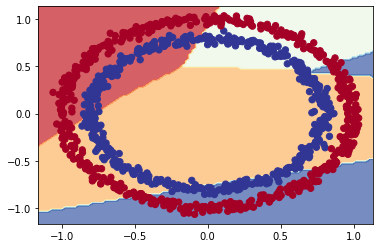

In [116]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_6,
                       x=x,
                       y=y)

it's binary class. it's better we have 1 neuron in output layer.

In [117]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(x, y, epochs=100, verbose=0)

In [118]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


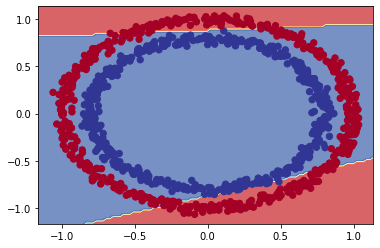

In [119]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_7,
                       x=x,
                       y=y)

In [120]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(x, y, epochs=100, verbose=0)

In [121]:
model_8.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification


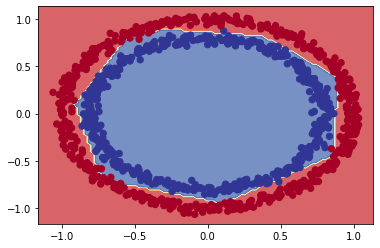

In [122]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_8,
                       x=x,
                       y=y)

Now we've discussed the consept of linear and non-linear functions (or lines), let's see them in action.

## Sigmoid activation function

Now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at `tf.keras.activations.sigmoid`.

In [123]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

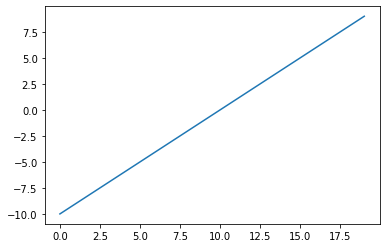

In [124]:
# Visualize our toy tensor
plt.plot(A);

In [125]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

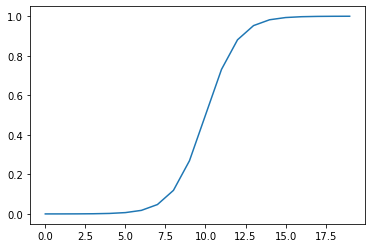

In [126]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

## ReLU activation function 

Now let's recreate the ReLU function and see what it does to our data. (ReLU turns all negatives to 0 and positive numbers stay the same)

In [127]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

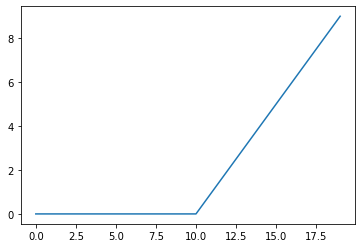

In [128]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

## Linear activation function

It looks like our inputs are unmodified

In [129]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

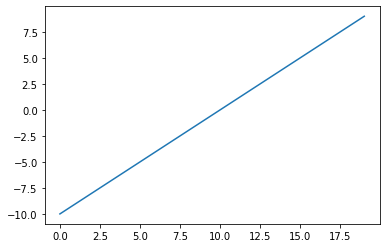

In [130]:
# Plot linear activation function
plt.plot(tf.keras.activations.linear(A));

In [131]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

In [132]:
# How many examples are in the whole dataset?
len(x)

1000

In [133]:
# Split data into train and test sets
x_train, y_train = x[:800], y[:800] # 80% of the data for the training set
x_test, y_test = x[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
x_train.shape, x_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

Great, now we've got training and test sets, let's model the training data and evaluate what our model has learned on the test set.

In [134]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_9.fit(x_train, y_train, epochs=25, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [135]:
model_9.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


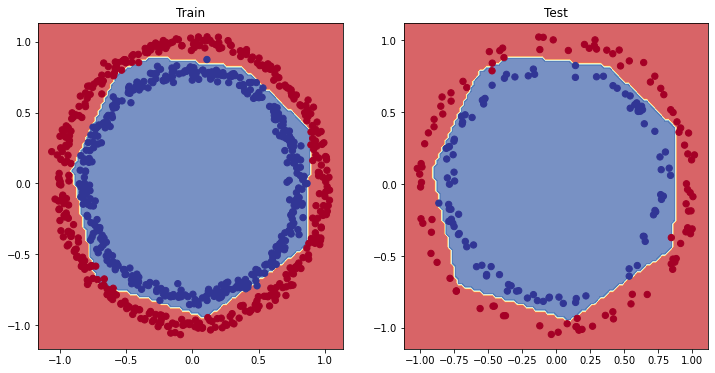

In [136]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, x=x_test, y=y_test)
plt.show()

## Plot the loss curves

Using the variable history when calling the `fit()` function on a model

In [137]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_9 training curves')

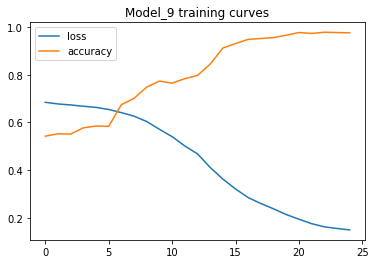

In [138]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 training curves")

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate
Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the learning rate.

In [139]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_9)
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_10.fit(x_train, 
                      y_train, 
                      epochs=100,
                      verbose=0,
                      callbacks=[lr_scheduler])

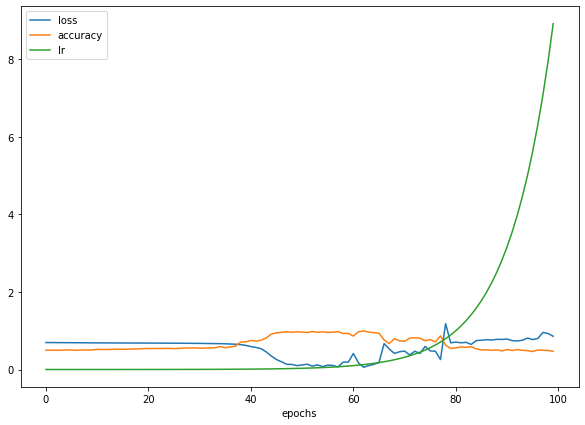

In [140]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

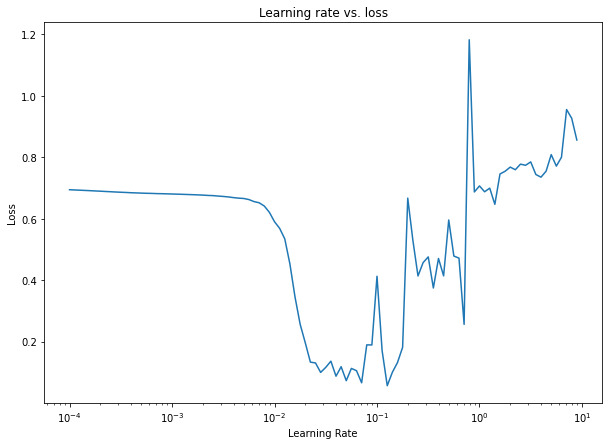

In [141]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In this case, our ideal learning rate ends up between 0.01 ($10^{-2}$) and 0.02. **0.07 is the best.**

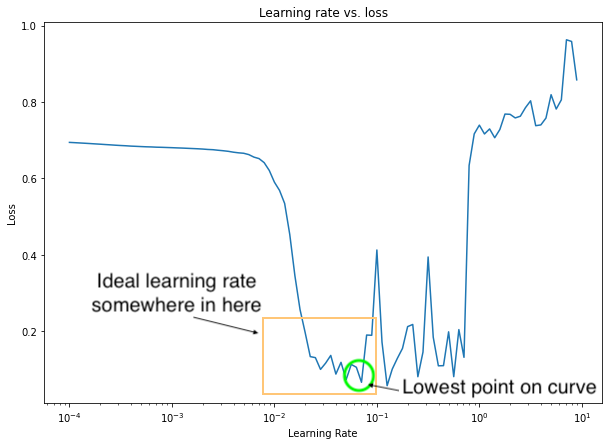

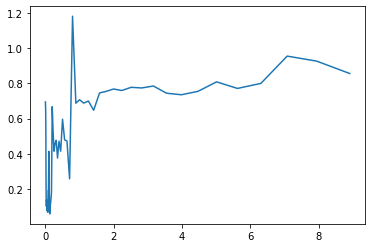

In [142]:
# It's wrong
plt.plot(lrs, history.history["loss"])

In [143]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_9)
model_11 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_11.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
              metrics=["accuracy"]) 

# Fit the model (passing the lr_scheduler callback)
history = model_11.fit(x_train, 
                      y_train, 
                      epochs=100,
                      verbose=0)

In [144]:
model_11.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000


[0.007229717914015055, 1.0]

## More classification evaluation methods

* **Accuracy** - Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. `sklearn.metrics.accuracy_score()` or `tf.keras.metrics.Accuracy()`

* **Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). `sklearn.metrics.precision_score()` or `tf.keras.metrics.Precision()`

* **Recall** - Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. `sklearn.metrics.recall_score()` or `tf.keras.metrics.Recall()` 

* **F1-score** - Combines precision and recall into one metric. 1 is best, 0 is worst. `sklearn.metrics.f1_score()`

* **Confusion matrix** - 	Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). `sklearn.metrics.plot_confusion_matrix()`

* **Classification report** - Collection of some of the main classification metrics such as precision, recall and f1-score. `	sklearn.metrics.classification_report()`

How about a confusion matrix?

In [145]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_11.predict(x_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)
# do not work because predictions array is continuous but test array is 1 and 0.

In [146]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [147]:
y_preds[:10]

array([[9.9567187e-01],
       [9.9708760e-01],
       [9.9933434e-01],
       [9.9695033e-01],
       [1.9074082e-03],
       [2.8166588e-07],
       [9.9751770e-01],
       [4.3490529e-04],
       [9.9974650e-01],
       [2.8940399e-06]], dtype=float32)

we need to get our predictions into the binary format (0 or 1).

In [148]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [149]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

How about we make a function to make our confusion matrix a little more visual?

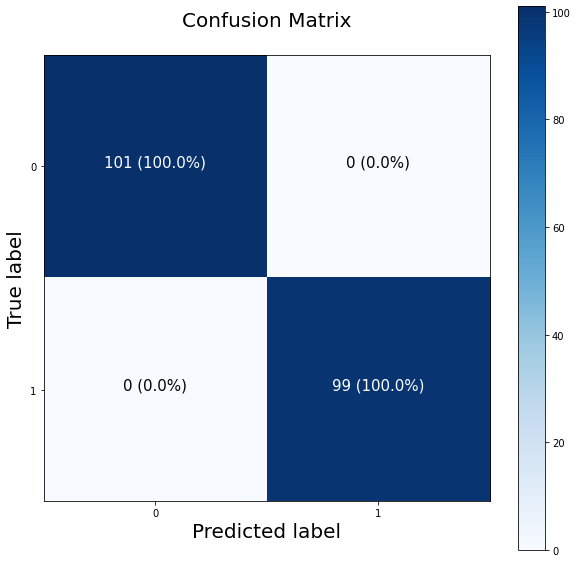

In [150]:
# Video 3.23
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

In [151]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [152]:
# Show the first training example
print(f"Training sample:\n{x_train[0]}\n") 
print(f"Training label: {y_train[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [153]:
# Check the shape of our data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [154]:
# Check shape of a single example
x_train[0].shape, y_train[0].shape

((28, 28), ())

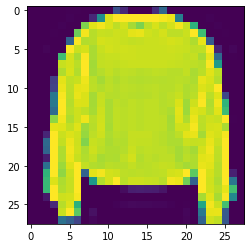

In [155]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(x_train[7]);

In [156]:
# Check our samples label
y_train[7]

2

**Labels**

Each training and test example is assigned to one of the following labels:

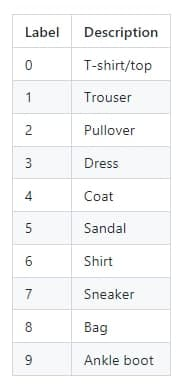

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

In [157]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

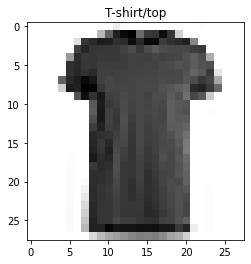

In [158]:
# Plot an example image and its label
plt.imshow(x_train[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[y_train[17]]);

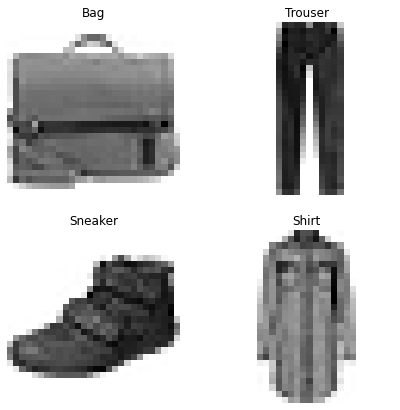

In [159]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture.

* **The input shape** will have to deal with 28x28 tensors (the height and width of our images). We're actually going to squash the input into a tensor (vector) of shape (784).

* **The output shape** will have to be 10 because we need our model to predict for 10 different classes.

* Change the **output layer activation parameter** to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class).

* Change our **loss function** from a binary loss function to a multiclass loss function. 
  * If our labels are in integer form, we'll use `tf.keras.losses.SparseCategoricalCrossentropy()`
  * If our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use `tf.keras.losses.CategoricalCrossentropy()`.


In [160]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_12.fit(x_train,
                                y_train,
                                epochs=10,
                                validation_data=(x_test, y_test)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [161]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [162]:
28*28

784

Also we can write bellow:

In [163]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_13.fit(x_train,
                                tf.one_hot(y_train, depth=10), # 10 is output shape
                                epochs=10,
                                validation_data=(x_test, tf.one_hot(y_test, depth=10))) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

* model 12 and 13 are the same.

* val_loss and val_accuracy are loss and accuracy in validation data.

* accuracy is low.


In [164]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_12.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_69 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_70 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [165]:
# Check the min and max values of the training data
x_train.min(), x_train.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as scaling or normalization).

In [166]:
# Divide train and test images by the maximum value (normalize it)
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# Check the min and max values of the training data
x_train_norm.min(), x_train_norm.max()

(0.0, 1.0)

Now we'll use the same model as before (model_12) except this time the data will be normalized.

In [167]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_14.fit(x_train_norm,
                            y_train,
                            epochs=10,
                            validation_data=(x_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

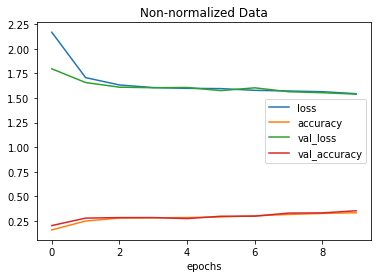

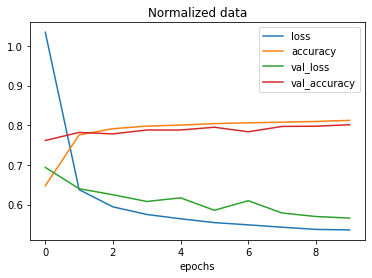

In [169]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data", xlabel="epochs")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data", xlabel="epochs");

🔑 **Note:** The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [170]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_15 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_15 = model_15.fit(x_train_norm,
                          y_train,
                          epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                          callbacks=[lr_scheduler], 
                          verbose=0)

In [171]:
model_15.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.8528 - accuracy: 0.2779


[1.8527904748916626, 0.27790001034736633]

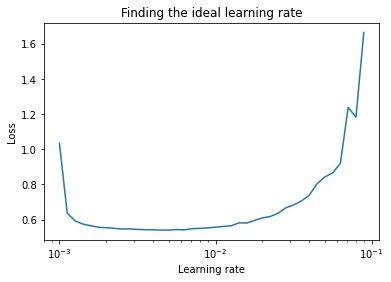

In [172]:
# Plot the learning rate decay curve

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history_15.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

it looks like somewhere close to the default learning rate of the Adam optimizer (0.002) is the ideal learning rate.

In [173]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_16 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                 metrics=["accuracy"])

# Fit the model
history_16 = model_16.fit(x_train_norm,
                          y_train,
                          epochs=20,
                          callbacks=[lr_scheduler], 
                          verbose=0)

In [174]:
model_16.evaluate(x_test_norm, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.8076


[0.5597474575042725, 0.8076000213623047]